In [10]:
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [7]:
load_dotenv()

True

In [ ]:

# create a LLM model instance
model = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

In [11]:
# create a state 
class LLMState(TypedDict):
    question: str
    answer: str

In [12]:
def llm_qa(State: LLMState) -> LLMState:
    # extract the question from the state

    question = State['question']

    # form a prompt 

    prompt = f"Answer the following question {question}"

    # ask that question to the LLm

    answer = model.invoke(prompt).content

    # update the state with the answer and return it
    State['answer'] = answer

    return State

In [13]:
# create a state graph

graph = StateGraph(LLMState)

# add nodes
graph.add_node('llm_qa',llm_qa)

# add edges
graph.add_edge(START,'llm_qa')
graph.add_edge('llm_qa',END)

# compile the graph
workflow = graph.compile()

In [14]:
# execute 
initial_state = {'question': ' How far is moon from the earth?'}

final_state = workflow.invoke(initial_state)

In [15]:
final_state

{'question': ' How far is moon from the earth?',
 'answer': "The distance between the Earth and the Moon varies because the Moon's orbit is elliptical.\n\n*   **Average distance:** 384,400 kilometers (238,900 miles)\n*   **Closest distance (perigee):** Around 363,104 kilometers (225,623 miles)\n*   **Farthest distance (apogee):** Around 405,696 kilometers (252,088 miles)"}

In [16]:
print(final_state['answer'])

The distance between the Earth and the Moon varies because the Moon's orbit is elliptical.

*   **Average distance:** 384,400 kilometers (238,900 miles)
*   **Closest distance (perigee):** Around 363,104 kilometers (225,623 miles)
*   **Farthest distance (apogee):** Around 405,696 kilometers (252,088 miles)


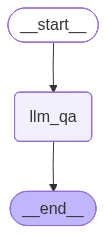

In [18]:
graph.compile()